In [2]:
#Import the packages

import nltk   
import pandas as pd
import numpy as np
from nltk import word_tokenize, pos_tag
from nltk import FreqDist
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#Reading the corpus

df=pd.read_csv(r'C:\Users\Sonu\Desktop\corpus.csv',encoding='utf-8')

In [66]:
df.head()

,Section_ID,Section_Text
0,Cite-1,authority. this part is issued pursuant to 12 ...
1,Cite-2,purpose this part prescribes standards under w...
2,Cite-3,scope. the standards set forth in this part ap...
3,Cite-4,reservation of authority. the occ may determin...
4,Cite-43,obligation issued by an obligor not possessing...


In [67]:
df.shape

(5135, 2)

In [68]:
df.columns

Index(['Section_ID', 'Section_Text'], dtype='object')

In [69]:
df.describe()

,Section_ID,Section_Text
count,5135,5135
unique,4911,4910
top,Cite-12,[reserved]
freq,8,8


In [70]:
#Word Tokenization

tokens = word_tokenize(df['Section_Text'].to_string())

In [71]:
#POS Tagging

pos_tagger = nltk.pos_tag(tokens)
print("With POS_TAG : ", pos_tagger)

With POS_TAG :  [('0', 'CD'), ('authority', 'NN'), ('.', '.'), ('this', 'DT'), ('part', 'NN'), ('is', 'VBZ'), ('issued', 'VBN'), ('pursuant', 'JJ'), ('to', 'TO'), ('12', 'CD'), ('...', ':'), ('1', 'CD'), ('purpose', 'NN'), ('this', 'DT'), ('part', 'NN'), ('prescribes', 'VBZ'), ('standards', 'NNS'), ('under', 'IN'), ('w', 'NN'), ('...', ':'), ('2', 'CD'), ('scope', 'NN'), ('.', '.'), ('the', 'DT'), ('standards', 'NNS'), ('set', 'VBD'), ('forth', 'NN'), ('in', 'IN'), ('this', 'DT'), ('part', 'NN'), ('ap', 'NN'), ('...', ':'), ('3', 'CD'), ('reservation', 'NN'), ('of', 'IN'), ('authority', 'NN'), ('.', '.'), ('the', 'DT'), ('occ', 'NN'), ('may', 'MD'), ('determin', 'VB'), ('...', ':'), ('4', 'CD'), ('obligation', 'NN'), ('issued', 'VBN'), ('by', 'IN'), ('an', 'DT'), ('obligor', 'NN'), ('not', 'RB'), ('possessing', 'VBG'), ('...', ':'), ('5', 'CD'), ('indirect', 'JJ'), ('commitment', 'NN'), ('of', 'IN'), ('full', 'JJ'), ('faith', 'NN'), ('and', 'CC'), ('credit', 'NN'), ('.', '.'), ('...', 

In [72]:
#Checking the frequency distribution of the POS tags

tag_fd = nltk.FreqDist(tag for (word, tag) in pos_tagger)
tag_fd.most_common(15)

[('NN', 12374),
 ('CD', 6385),
 (':', 5489),
 ('DT', 4875),
 ('IN', 4116),
 ('JJ', 3996),
 ('NNS', 3200),
 ('.', 2584),
 ('VBZ', 1215),
 ('VB', 1002),
 ('CC', 980),
 ('(', 938),
 (')', 862),
 (',', 757),
 ('TO', 717)]

In [73]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'(The|the|A|a|An|an)$', 'AT'),   # articles 
    (r'.*able$', 'JJ'),                # adjectives 
    (r'.*ness$', 'NN'),                # nouns formed from adjectives
    (r'.*ly$', 'RB'),                  # adverbs
    (r'(He|he|She|she|It|it|I|me|Me|You|you)$', 'PRP'), # pronouns
    (r'(His|his|Her|her|Its|its)$', 'PRP$'),    # possesive
    (r'(my|Your|your|Yours|yours)$', 'PRP$'),   # possesive
    (r'(on|On|in|In|at|At|since|Since)$', 'IN'),# time prepopsitions
    (r'(for|For|ago|Ago|before|Before)$', 'IN'),# time prepopsitions
    (r'(till|Till|until|Until)$', 'IN'),        # time prepopsitions
    (r'(by|By|beside|Beside)$', 'IN'),          # space prepopsitions
    (r'(under|Under|below|Below)$', 'IN'),      # space prepopsitions
    (r'(over|Over|above|Above)$', 'IN'),        # space prepopsitions
    (r'(across|Across|through|Through)$', 'IN'),# space prepopsitions
    (r'(into|Into|towards|Towards)$', 'IN'),    # space prepopsitions
    (r'(onto|Onto|from|From)$', 'IN'),          # space prepopsitions    
    (r'\.$','.'), (r'\,$',','), (r'\?$','?'),    # fullstop, comma, Qmark
    (r'\($','('), (r'\)$',')'),             # round brackets
    (r'\[$','['), (r'\]$',']'),             # square brackets
    (r'(Sam)$', 'NAM'),
    # WARNING : Put the default value in the end
    (r'.*', 'NN')                      # nouns (default)
    ]



In [74]:
#Using regex to get the pattern for taggers

regexp_tagger = nltk.RegexpTagger(patterns)

print(regexp_tagger.tag(tokens))
print(regexp_tagger.evaluate(df))


[('0', 'CD'), ('authority', 'NN'), ('.', '.'), ('this', 'NNS'), ('part', 'NN'), ('is', 'NNS'), ('issued', 'VBD'), ('pursuant', 'NN'), ('to', 'NN'), ('12', 'CD'), ('...', 'NN'), ('1', 'CD'), ('purpose', 'NN'), ('this', 'NNS'), ('part', 'NN'), ('prescribes', 'VBZ'), ('standards', 'NNS'), ('under', 'IN'), ('w', 'NN'), ('...', 'NN'), ('2', 'CD'), ('scope', 'NN'), ('.', '.'), ('the', 'AT'), ('standards', 'NNS'), ('set', 'NN'), ('forth', 'NN'), ('in', 'IN'), ('this', 'NNS'), ('part', 'NN'), ('ap', 'NN'), ('...', 'NN'), ('3', 'CD'), ('reservation', 'NN'), ('of', 'NN'), ('authority', 'NN'), ('.', '.'), ('the', 'AT'), ('occ', 'NN'), ('may', 'NN'), ('determin', 'NN'), ('...', 'NN'), ('4', 'CD'), ('obligation', 'NN'), ('issued', 'VBD'), ('by', 'IN'), ('an', 'AT'), ('obligor', 'NN'), ('not', 'NN'), ('possessing', 'VBG'), ('...', 'NN'), ('5', 'CD'), ('indirect', 'NN'), ('commitment', 'NN'), ('of', 'NN'), ('full', 'NN'), ('faith', 'NN'), ('and', 'NN'), ('credit', 'NN'), ('.', '.'), ('...', 'NN'), ('

ValueError: not enough values to unpack (expected 2, got 1)

In [76]:
#Storing the frequencies into a data frame

dfN = pd.DataFrame(tag_fd,index=['NN','CD',':','DT','IN','JJ','NNS','.','VBZ','VB']) 
size=15
dfN

,CD,NN,.,DT,VBZ,VBN,JJ,TO,:,NNS,...,RBS,'',JJS,SYM,EX,NNPS,NNP,RBR,#,WP$
NN,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
CD,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
:,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
DT,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
IN,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
JJ,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
NNS,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
.,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
VBZ,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4
VB,6385,12374,2584,4875,1215,601,3996,717,5489,3200,...,3,8,9,6,12,1,16,4,2,4


In [78]:
dfN.columns

Index(['CD', 'NN', '.', 'DT', 'VBZ', 'VBN', 'JJ', 'TO', ':', 'NNS', 'IN',
       'VBD', 'MD', 'VB', 'RB', 'VBG', 'CC', '(', ')', ',', 'WDT', 'POS',
       'JJR', 'VBP', '$', 'WRB', 'RP', 'PRP', 'WP', 'FW', 'PRP$', 'RBS', '''',
       'JJS', 'SYM', 'EX', 'NNPS', 'NNP', 'RBR', '#', 'WP$'],
      dtype='object')

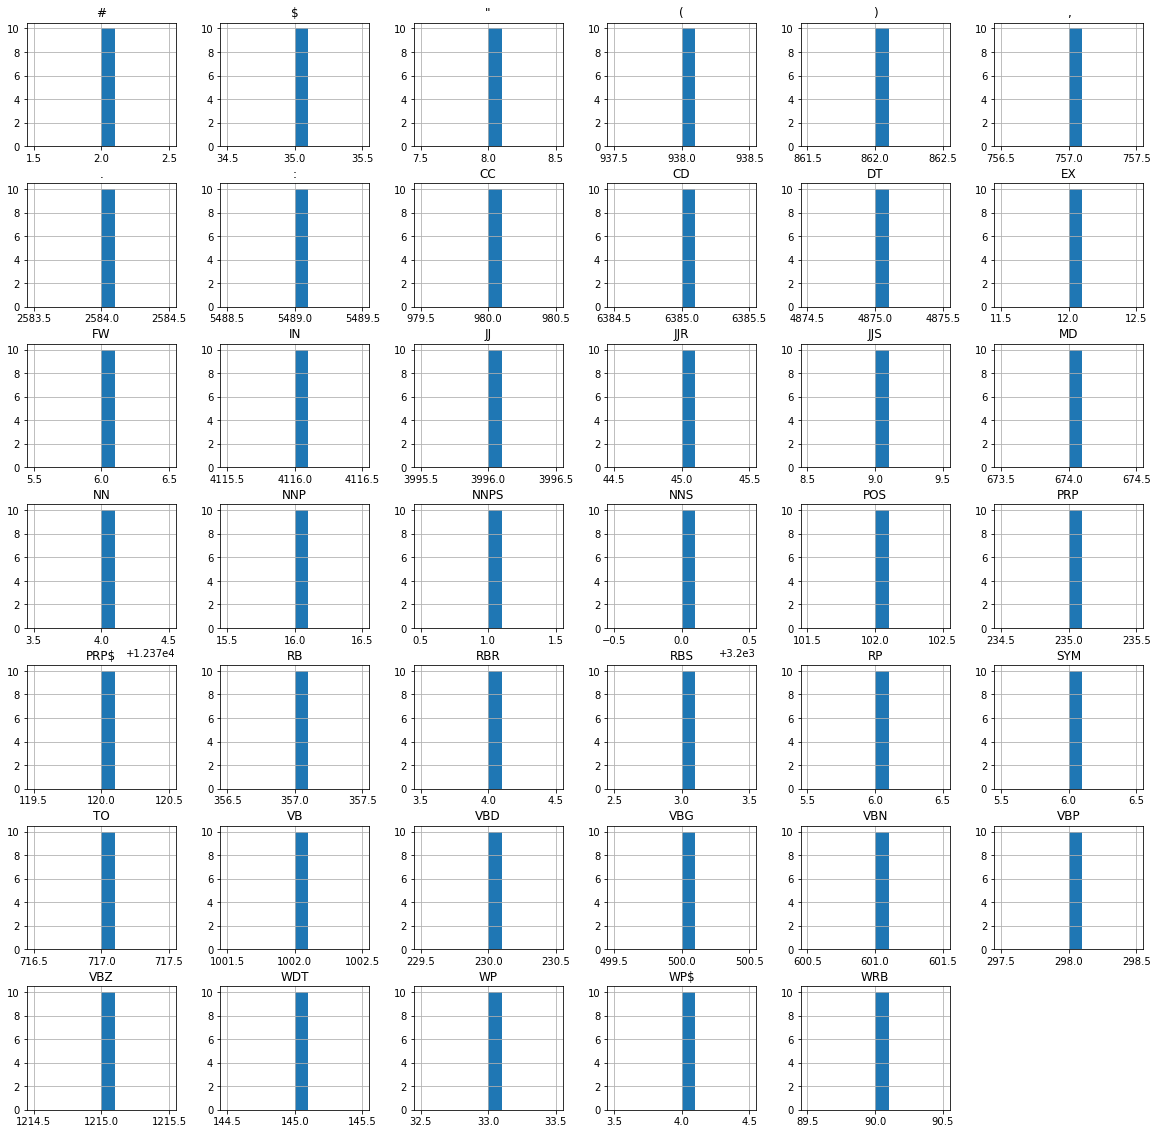

In [77]:
#Plotting the frequencies of POS on histograms

dfN.hist(figsize=(20,20))
plt.show()